In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

borough_map = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}

# columns
# BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
dir_path = r"C:\Users\bhatt\repos\nyc_historical_mortgage_analysis\mortgage_data_csv"

def load_data(directory: str):
    all_data = pd.DataFrame()
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            all_data = pd.concat([all_data, df], ignore_index=True)
    all_data['SALE DATE'] = pd.to_datetime(all_data['SALE DATE'])
    all_data['SALE PRICE'] = pd.to_numeric(all_data['SALE PRICE'], errors='coerce')
    all_data['BOROUGH'] = all_data['BOROUGH'].map(borough_map)
    all_data['NEIGHBORHOOD'] = all_data['NEIGHBORHOOD'].str.strip().str.title()
    all_data = all_data[all_data['SALE PRICE'] > 0]
    return all_data

df = load_data(dir_path)

In [2]:
foresthills = df[df["NEIGHBORHOOD"].str.lower() == "forest hills"]

C:\Users\bhatt\AppData\Local\Temp\ipykernel_30232\339722663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhavg['YEAR'] = fhavg['SALE DATE'].dt.year


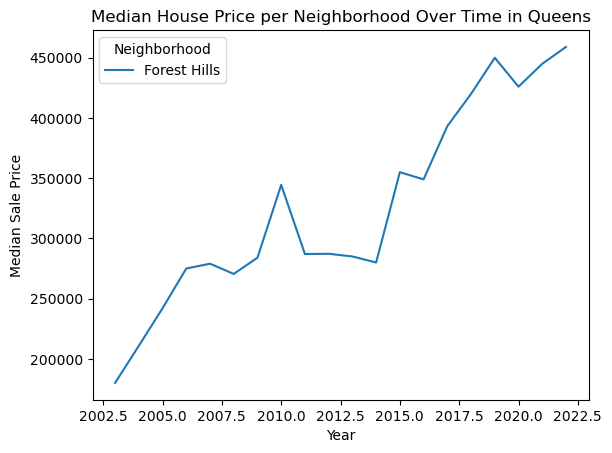

In [4]:
fhavg = foresthills
fhavg['YEAR'] = fhavg['SALE DATE'].dt.year
fhavg = fhavg.groupby(['NEIGHBORHOOD', 'YEAR'])['SALE PRICE'].median().unstack(0)
fhavg.plot(kind='line')
plt.title('Median House Price per Neighborhood Over Time in Queens')
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.legend(title='Neighborhood')
plt.show()